In [ ]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 

In [75]:
data = pd.read_csv('./Updated_data_car_price_prediction.csv')
data


,Unnamed: 0,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...,...
5507,5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [81]:
data[(data["car_prices_in_lakhs"]<8.0) & (data["car_prices_in_lakhs"]>2.0) & (data["car_company"]=="Fiat")]

,Unnamed: 0,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
618,618,2.24,Fiat,39520.0,Petrol,Manual,1,2013,2498.0,5
1081,1081,3.47,Fiat,73818.0,Diesel,Manual,1,2014,2498.0,6
1838,1838,2.70,Fiat,127152.0,Diesel,Manual,1,2014,1248.0,5
1912,1912,2.24,Fiat,39520.0,Petrol,Manual,1,2013,1198.0,5
2037,2037,3.00,Fiat,100000.0,Diesel,Manual,2,2014,1396.0,5
2685,2685,3.35,Fiat,47547.0,Diesel,Manual,2,2014,1497.0,5
3181,3181,2.18,Fiat,64712.0,Petrol,Manual,2,2015,998.0,5
3779,3779,4.08,Fiat,51490.0,Diesel,Manual,1,2015,796.0,7
3941,3941,3.32,Fiat,12179.0,Petrol,Manual,1,2015,998.0,5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError,Accuracy
from tensorflow.keras import regularizers


In [ ]:
import json

with open("car_company.json","w+") as f:
  json.dump(list(data['car_company'].unique()),f)

print()


In [86]:
pd.unique(data["engine_in_cc"])

array([1956., 1330., 2494., 1199., 1197., 1498., 1497., 1368., 1396.,
       1373., 1198., 1462.,  799.,  998., 1591., 1999.,  999.,  814.,
        796., 1353., 1451., 1995., 1991., 2179., 1798., 1985., 1968.,
       2993., 4134., 1598.,  936., 1248., 2143., 1086., 1998., 2198.,
       2499., 1496., 1186., 1582., 1984., 1997., 1969., 1493., 2755.,
       1196., 2953., 2184., 1461., 2987., 1950., 1395., 2523., 1193.,
       1061., 1298., 1586.,  993., 2354., 1405., 2967.,    0., 2694.,
       2696., 2609., 2998., 2477., 2393., 2982., 2199., 1799., 3198.,
       1194., 2997., 1495., 1794., 2498., 1364., 1388., 2596., 1173.,
       1797., 1499., 1399., 4461., 2400., 1896., 1796., 3956.,  995.,
       2995., 2487.,  624., 1993., 2925., 1599., 1299., 1120., 2489.,
       5461., 3996., 1595., 4367., 1996., 5950., 2996., 4663., 1150.,
       2359., 1422., 1242., 2698., 2999., 2894., 2360., 5000., 2835.,
       1596., 1047., 2446.,  909., 2197., 1527., 1398., 2994., 2956.,
       1781., 2497.,

In [97]:
pd.unique(data["engine_in_cc"]).nsmallest()

AttributeError: 'numpy.ndarray' object has no attribute 'nsmallest'

In [96]:
top5 = pd.unique(data["engine_in_cc"].nsmallest(100, 'engine_in_cc'))
print(top5)


ValueError: keep must be either "first", "last" or "all"

In [10]:
print("\n",pd.unique(data['car_company']))
print("\n",pd.unique(data['car_prices_in_lakhs']))
print("\n",pd.unique(data['kms_driven']))
print("\n",pd.unique(data['fuel_type']))
print("\n",pd.unique(data['transmission']))
print("\n",pd.unique(data['ownership']))
print("\n",pd.unique(data['manufacture_year']))
print("\n",pd.unique(data['engine_in_cc']))
print("\n",pd.unique(data['seats']))


 ['Jeep' 'Renault' 'Toyota' 'Honda' 'Volkswagen' 'Maruti' 'Mahindra'
 'Hyundai' 'Nissan' 'Kia' 'MG' 'Tata' 'BMW' 'Mercedes-Benz' 'Datsun'
 'Volvo' 'Audi' 'Porsche' 'Ford' 'Chevrolet' 'Skoda' 'Lexus' 'Land' 'Mini'
 'Jaguar' 'Mitsubishi' 'Force' 'Premier' 'Fiat' 'Maserati' 'Bentley'
 'Isuzu']

 [10.03 12.83 16.4  ... 28.9  64.9  31.9 ]

 [ 86226.  13248.  60343. ... 154000.  79718.  85002.]

 ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']

 ['Manual' 'Automatic']

 [1 2 3 4 5]

 [2017 2021 2016 2018 2015 2014 2020 2019 2012 2008 2013 2022 2010 2005
 2009 2006 2011 2007 2002 2004 1998 2003 1995 2000 2001 1999]

 [1956. 1330. 2494. 1199. 1197. 1498. 1497. 1368. 1396. 1373. 1198. 1462.
  799.  998. 1591. 1999.  999.  814.  796. 1353. 1451. 1995. 1991. 2179.
 1798. 1985. 1968. 2993. 4134. 1598.  936. 1248. 2143. 1086. 1998. 2198.
 2499. 1496. 1186. 1582. 1984. 1997. 1969. 1493. 2755. 1196. 2953. 2184.
 1461. 2987. 1950. 1395. 2523. 1193. 1061. 1298. 1586.  993. 2354. 1405.
 2967.    0. 2694. 26

In [11]:
data = data.iloc[:,1:]

In [12]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [14]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Columns to encode
cols_to_encode = ['car_company', 'fuel_type', 'transmission']  # or [1,3,4]

# Dictionary to hold encoders
encoders = {}

# Apply label encoding per column
for col in cols_to_encode:
    le = LabelEncoder()
    data.loc[:, col] = le.fit_transform(data.loc[:, col])
    encoders[col] = le

# Save all encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
categorical_features = ["car_company","fuel_type","transmission"]
numeric_features = ["kms_driven","manufacture_year","engine_in_cc","seats","ownership"]

In [15]:
print("\n",pd.unique(data['car_company']))
print("\n",pd.unique(data['car_prices_in_lakhs']))
print("\n",pd.unique(data['kms_driven']))
print("\n",pd.unique(data['fuel_type']))
print("\n",pd.unique(data['transmission']))
print("\n",pd.unique(data['ownership']))
print("\n",pd.unique(data['manufacture_year']))
print("\n",pd.unique(data['engine_in_cc']))
print("\n",pd.unique(data['seats']))


 [12 26 29 8 30 18 17 9 23 13 16 28 1 20 4 31 0 24 7 3 27 15 14 21 11 22 6
 25 5 19 2 10]

 [10.03 12.83 16.4  ... 28.9  64.9  31.9 ]

 [ 86226.  13248.  60343. ... 154000.  79718.  85002.]

 [1 4 0 2 3]

 [1 0]

 [1 2 3 4 5]

 [2017 2021 2016 2018 2015 2014 2020 2019 2012 2008 2013 2022 2010 2005
 2009 2006 2011 2007 2002 2004 1998 2003 1995 2000 2001 1999]

 [1956. 1330. 2494. 1199. 1197. 1498. 1497. 1368. 1396. 1373. 1198. 1462.
  799.  998. 1591. 1999.  999.  814.  796. 1353. 1451. 1995. 1991. 2179.
 1798. 1985. 1968. 2993. 4134. 1598.  936. 1248. 2143. 1086. 1998. 2198.
 2499. 1496. 1186. 1582. 1984. 1997. 1969. 1493. 2755. 1196. 2953. 2184.
 1461. 2987. 1950. 1395. 2523. 1193. 1061. 1298. 1586.  993. 2354. 1405.
 2967.    0. 2694. 2696. 2609. 2998. 2477. 2393. 2982. 2199. 1799. 3198.
 1194. 2997. 1495. 1794. 2498. 1364. 1388. 2596. 1173. 1797. 1499. 1399.
 4461. 2400. 1896. 1796. 3956.  995. 2995. 2487.  624. 1993. 2925. 1599.
 1299. 1120. 2489. 5461. 3996. 1595. 4367. 1996. 595

In [ ]:
def r(x):
  return round(x)

In [16]:
tensor_data = tf.constant(data,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(5512, 9), dtype=float32, numpy=
array([[1.0030e+01, 1.2000e+01, 8.6226e+04, ..., 2.0170e+03, 1.9560e+03,
        5.0000e+00],
       [1.2830e+01, 2.6000e+01, 1.3248e+04, ..., 2.0210e+03, 1.3300e+03,
        5.0000e+00],
       [1.6400e+01, 2.9000e+01, 6.0343e+04, ..., 2.0160e+03, 2.4940e+03,
        5.0000e+00],
       ...,
       [1.3750e+01, 1.1000e+01, 9.0000e+04, ..., 2.0130e+03, 2.7550e+03,
        5.0000e+00],
       [2.9900e+01, 1.0000e+00, 7.9000e+04, ..., 2.0150e+03, 2.9670e+03,
        6.0000e+00],
       [3.1900e+01, 1.0000e+00, 4.2000e+04, ..., 2.0170e+03, 1.9910e+03,
        5.0000e+00]], dtype=float32)>

In [17]:
t = pd.DataFrame(tensor_data)
t

,0,1,2,3,4,5,6,7,8
0,10.030000,12.0,86226.0,1.0,1.0,1.0,2017.0,1956.0,5.0
1,12.830000,26.0,13248.0,4.0,0.0,1.0,2021.0,1330.0,5.0
2,16.400000,29.0,60343.0,4.0,0.0,1.0,2016.0,2494.0,5.0
3,7.770000,8.0,26696.0,4.0,0.0,1.0,2018.0,1199.0,5.0
4,5.150000,30.0,69414.0,4.0,1.0,1.0,2016.0,1199.0,5.0
...,...,...,...,...,...,...,...,...,...
5507,28.900000,1.0,45000.0,1.0,0.0,1.0,2018.0,2995.0,7.0
5508,64.900002,1.0,29000.0,4.0,0.0,2.0,2015.0,1968.0,5.0
5509,13.750000,11.0,90000.0,1.0,0.0,2.0,2013.0,2755.0,5.0
5510,29.900000,1.0,79000.0,1.0,0.0,3.0,2015.0,2967.0,6.0


In [18]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(5512, 9), dtype=float32, numpy=
array([[4.5000e+00, 1.7000e+01, 1.2000e+05, ..., 2.0130e+03, 2.5230e+03,
        7.0000e+00],
       [8.0000e+00, 1.8000e+01, 1.0000e+05, ..., 2.0190e+03, 1.9500e+03,
        5.0000e+00],
       [6.3000e+00, 1.8000e+01, 3.6438e+04, ..., 2.0180e+03, 2.1790e+03,
        7.0000e+00],
       ...,
       [5.1400e+00, 9.0000e+00, 4.4357e+04, ..., 2.0170e+03, 1.1970e+03,
        7.0000e+00],
       [6.1100e+00, 1.8000e+01, 1.8740e+04, ..., 2.0190e+03, 9.9900e+02,
        5.0000e+00],
       [1.8900e+01, 2.1000e+01, 2.9000e+04, ..., 2.0140e+03, 2.4990e+03,
        5.0000e+00]], dtype=float32)>

In [19]:
X = tensor_data[:,1:]
X

<tf.Tensor: shape=(5512, 8), dtype=float32, numpy=
array([[1.7000e+01, 1.2000e+05, 1.0000e+00, ..., 2.0130e+03, 2.5230e+03,
        7.0000e+00],
       [1.8000e+01, 1.0000e+05, 1.0000e+00, ..., 2.0190e+03, 1.9500e+03,
        5.0000e+00],
       [1.8000e+01, 3.6438e+04, 4.0000e+00, ..., 2.0180e+03, 2.1790e+03,
        7.0000e+00],
       ...,
       [9.0000e+00, 4.4357e+04, 4.0000e+00, ..., 2.0170e+03, 1.1970e+03,
        7.0000e+00],
       [1.8000e+01, 1.8740e+04, 4.0000e+00, ..., 2.0190e+03, 9.9900e+02,
        5.0000e+00],
       [2.1000e+01, 2.9000e+04, 1.0000e+00, ..., 2.0140e+03, 2.4990e+03,
        5.0000e+00]], dtype=float32)>

In [20]:
y = tensor_data[:,0]
y = tf.expand_dims(y,axis=-1)
y

<tf.Tensor: shape=(5512, 1), dtype=float32, numpy=
array([[ 4.5 ],
       [ 8.  ],
       [ 6.3 ],
       ...,
       [ 5.14],
       [ 6.11],
       [18.9 ]], dtype=float32)>

In [21]:
normalizer = Normalization()

In [22]:
normalizer.adapt(X)

In [23]:
normalizer(X[:5])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.18913944,  1.3572581 , -1.0682504 ,  0.62547606,  0.82257533,
        -0.6252018 ,  1.7105858 ,  2.4295113 ],
       [ 0.31213808,  0.8792504 , -1.0682504 ,  0.62547606,  0.82257533,
         0.9024339 ,  0.72121936, -0.348225  ],
       [ 0.31213808, -0.6399058 ,  0.91854393,  0.62547606,  0.82257533,
         0.6478279 ,  1.1166205 ,  2.4295113 ],
       [ 0.31213808, -0.9132784 ,  0.91854393,  0.62547606, -0.6032218 ,
         0.9024339 , -0.57894284, -0.348225  ],
       [-0.79484975,  0.8028887 , -1.0682504 ,  0.62547606, -0.6032218 ,
         0.39322197, -0.92254484, -0.348225  ]], dtype=float32)>

In [24]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[1.7000e+01, 1.2000e+05, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0130e+03, 2.5230e+03, 7.0000e+00],
       [1.8000e+01, 1.0000e+05, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0190e+03, 1.9500e+03, 5.0000e+00],
       [1.8000e+01, 3.6438e+04, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0180e+03, 2.1790e+03, 7.0000e+00],
       [1.8000e+01, 2.5000e+04, 4.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0190e+03, 1.1970e+03, 5.0000e+00],
       [9.0000e+00, 9.6805e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0170e+03, 9.9800e+02, 5.0000e+00]], dtype=float32)>

In [25]:
Train_ratio = 0.7
Test_ratio = 0.3
data_len = len(data)

In [26]:
X_train = X[:int(data_len*Train_ratio)]
y_train = y[:int(data_len*Train_ratio)]
print(X_train.shape)
print(y_train.shape)

(3858, 8)
(3858, 1)


In [27]:
X_test = X[int(data_len*(Train_ratio)):]
y_test = y[int(data_len*(Train_ratio)):]
print(X_test.shape)
print(y_test.shape)

(1654, 8)
(1654, 1)


In [28]:
model = RandomForestRegressor(n_estimators=-1)
# rmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


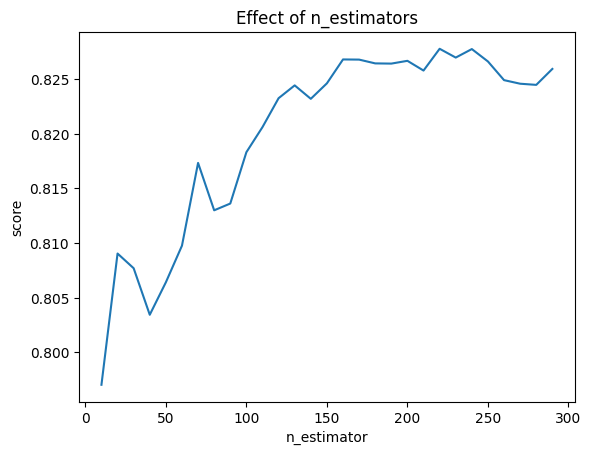

In [29]:
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n,random_state=42,oob_score=True)
    model.fit(np.array(X_train), np.array(y_train).ravel())
    scores.append(model.score(np.array(X_test), np.array(y_test).ravel()))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [30]:
int(estimators[scores.index(np.max(scores))])

220

In [31]:
scores.index(np.max(scores))

21

In [32]:
float(estimators[21])

220.0

In [33]:
rmodel = RandomForestRegressor(n_estimators=220,random_state=42, oob_score=True)
rmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=220, oob_score=True, random_state=42)

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ("cat",LabelEncoder(),categorical_features),
        ("num","passthrough",numeric_features)
    ]
)

In [ ]:
pipeline = Pipeline(steps = [
    ("preprocessor",preprocessor),
    ("regressor"),RandomForestRegressor(n_estimators=210,random_state=42, oob_score=True)
])

In [34]:
X = data.iloc[:,1:]
X

,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,12,86226.0,1,1,1,2017,1956.0,5
1,26,13248.0,4,0,1,2021,1330.0,5
2,29,60343.0,4,0,1,2016,2494.0,5
3,8,26696.0,4,0,1,2018,1199.0,5
4,30,69414.0,4,1,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...
5507,1,45000.0,1,0,1,2018,2995.0,7
5508,1,29000.0,4,0,2,2015,1968.0,5
5509,11,90000.0,1,0,2,2013,2755.0,5
5510,1,79000.0,1,0,3,2015,2967.0,6


In [35]:
y = data.iloc[:,0]
y

,car_prices_in_lakhs
0,10.03
1,12.83
2,16.40
3,7.77
4,5.15
...,...
5507,28.90
5508,64.90
5509,13.75
5510,29.90


In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(X_train,np.expand_dims(y_test,axis=0))

ValueError: too many values to unpack (expected 2)

In [36]:
y_pred = rmodel.predict(X_test)

In [37]:
y_pred

array([ 7.34204541,  3.54936361,  1.36264545, ...,  5.05699998,
        5.54977268, 19.93681805])

In [ ]:
model.add(InputLayer(shape=(8,)))
model.add(normalizer)
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(1))

In [ ]:
model = Sequential()

In [ ]:
# X.shape,y.shape

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,514 (166.07 KB)

 Trainable params: 42,497 (166.00 KB)

 Non-trainable params: 17 (72.00 B)

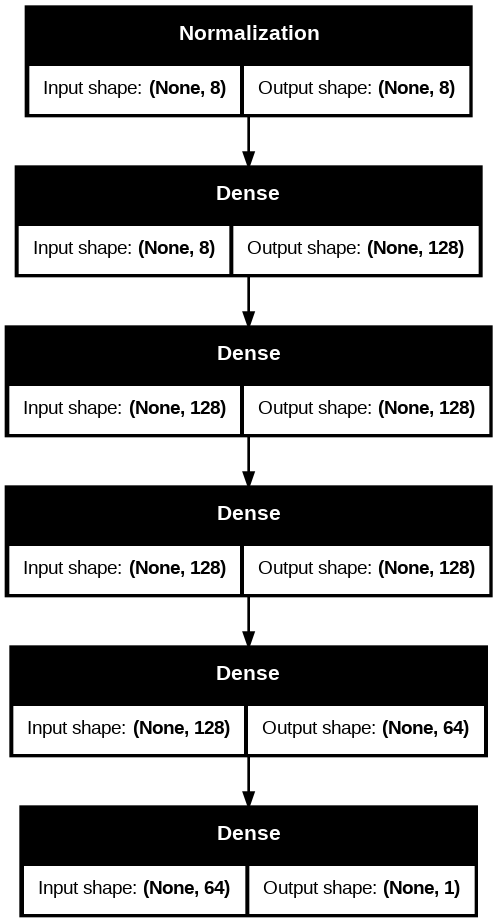

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,dpi=96)

In [ ]:
Train_ratio = 0.7
Validation_ratio = 0.2
Test_ratio = 0.1
data_len = len(data)

In [ ]:
X_train = X[:int(data_len*Train_ratio)]
y_train = y[:int(data_len*Train_ratio)]
print(X_train.shape)
print(y_train.shape)

(3858, 8)
(3858, 1)


In [ ]:
X_val = X[int(data_len*Train_ratio):int(data_len*(Validation_ratio+Train_ratio))]
y_val = y[int(data_len*Train_ratio):int(data_len*(Validation_ratio+Train_ratio))]
print(X_val.shape)
print(y_val.shape)

(1102, 8)
(1102, 1)


In [ ]:
X_test = X[int(data_len*(Validation_ratio+Train_ratio)):]
y_test = y[int(data_len*(Validation_ratio+Train_ratio)):]
print(X_test.shape)
print(y_test.shape)

(552, 8)
(552, 1)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 11.4751 - root_mean_squared_error: 20.9882 - val_loss: 7.0889 - val_root_mean_squared_error: 15.3551
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.6503 - root_mean_squared_error: 14.2051 - val_loss: 6.5507 - val_root_mean_squared_error: 15.8064
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7825 - root_mean_squared_error: 16.6279 - val_loss: 6.2195 - val_root_mean_squared_error: 14.9032
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5675 - root_mean_squared_error: 15.9066 - val_loss: 6.0947 - val_root_mean_squared_error: 15.0495
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7617 - root_mean_squared_error: 18.1680 - val_loss: 5.9950 - val_root_mean_squared_error: 14.8147
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1852 - root_mean_squared_error: 16.5283 - val_loss: 5.9072 - val_root_mean_squared_error: 15.1941
Epoch 7/100
121/121 ━━━━━━━━━━━━

In [ ]:
history = model.history.history

In [ ]:
history

Text(0, 0.5, 'Loss')

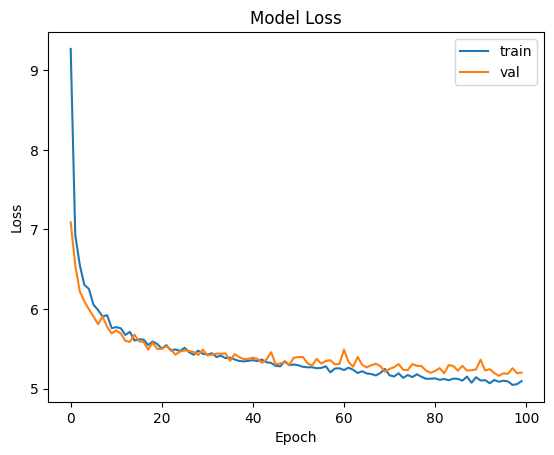

In [ ]:
# plt.subplot(121)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['train','val'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale('log')
# plt.subplot(122)


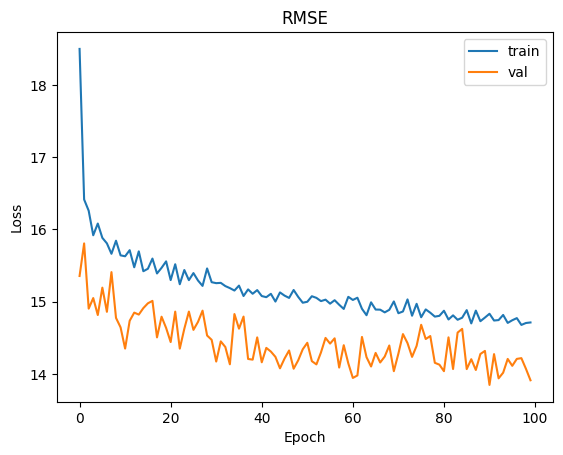

In [ ]:
plt.plot(history['root_mean_squared_error'])
plt.plot(history['val_root_mean_squared_error'])
plt.legend(['train','val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale('log')
plt.title('RMSE')
plt.show()

In [ ]:
model.evaluate(x=X_test,y=y_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [ ]:
print(tf.expand_dims(X_test[87],axis=0))

tf.Tensor(
[[8.000e+00 1.200e+05 4.000e+00 1.000e+00 4.000e+00 2.011e+03 1.086e+03
  7.000e+00]], shape=(1, 8), dtype=float32)


In [40]:
print(model.predict(tf.expand_dims(X_test[21],axis=0)))
y_test[21]

[7.06448277]


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8.53], dtype=float32)>

In [41]:
y_test[87]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5], dtype=float32)>

In [42]:
y_pred = model.predict(X_test)[:]
y_pred.shape


(1654,)

In [43]:
print(y_pred.shape)
type(y_pred)

(1654,)


numpy.ndarray

In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(y_test), np.array(y_pred))
print("R² Score:", r2)

R² Score: 0.8259393447446126


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(np.array(y_test), np.array(y_pred))
mae = mean_absolute_error(np.array(y_test), np.array(y_pred))

print("MSE:", mse)
print("MAE:", mae)

MSE: 60.913011506633005
MAE: 3.2434175873584765


In [46]:
y_test.shape

TensorShape([1654, 1])

In [47]:
y_true = y_test[:,0]
print(y_true.shape)
y_true = np.array(y_true)

(1654,)


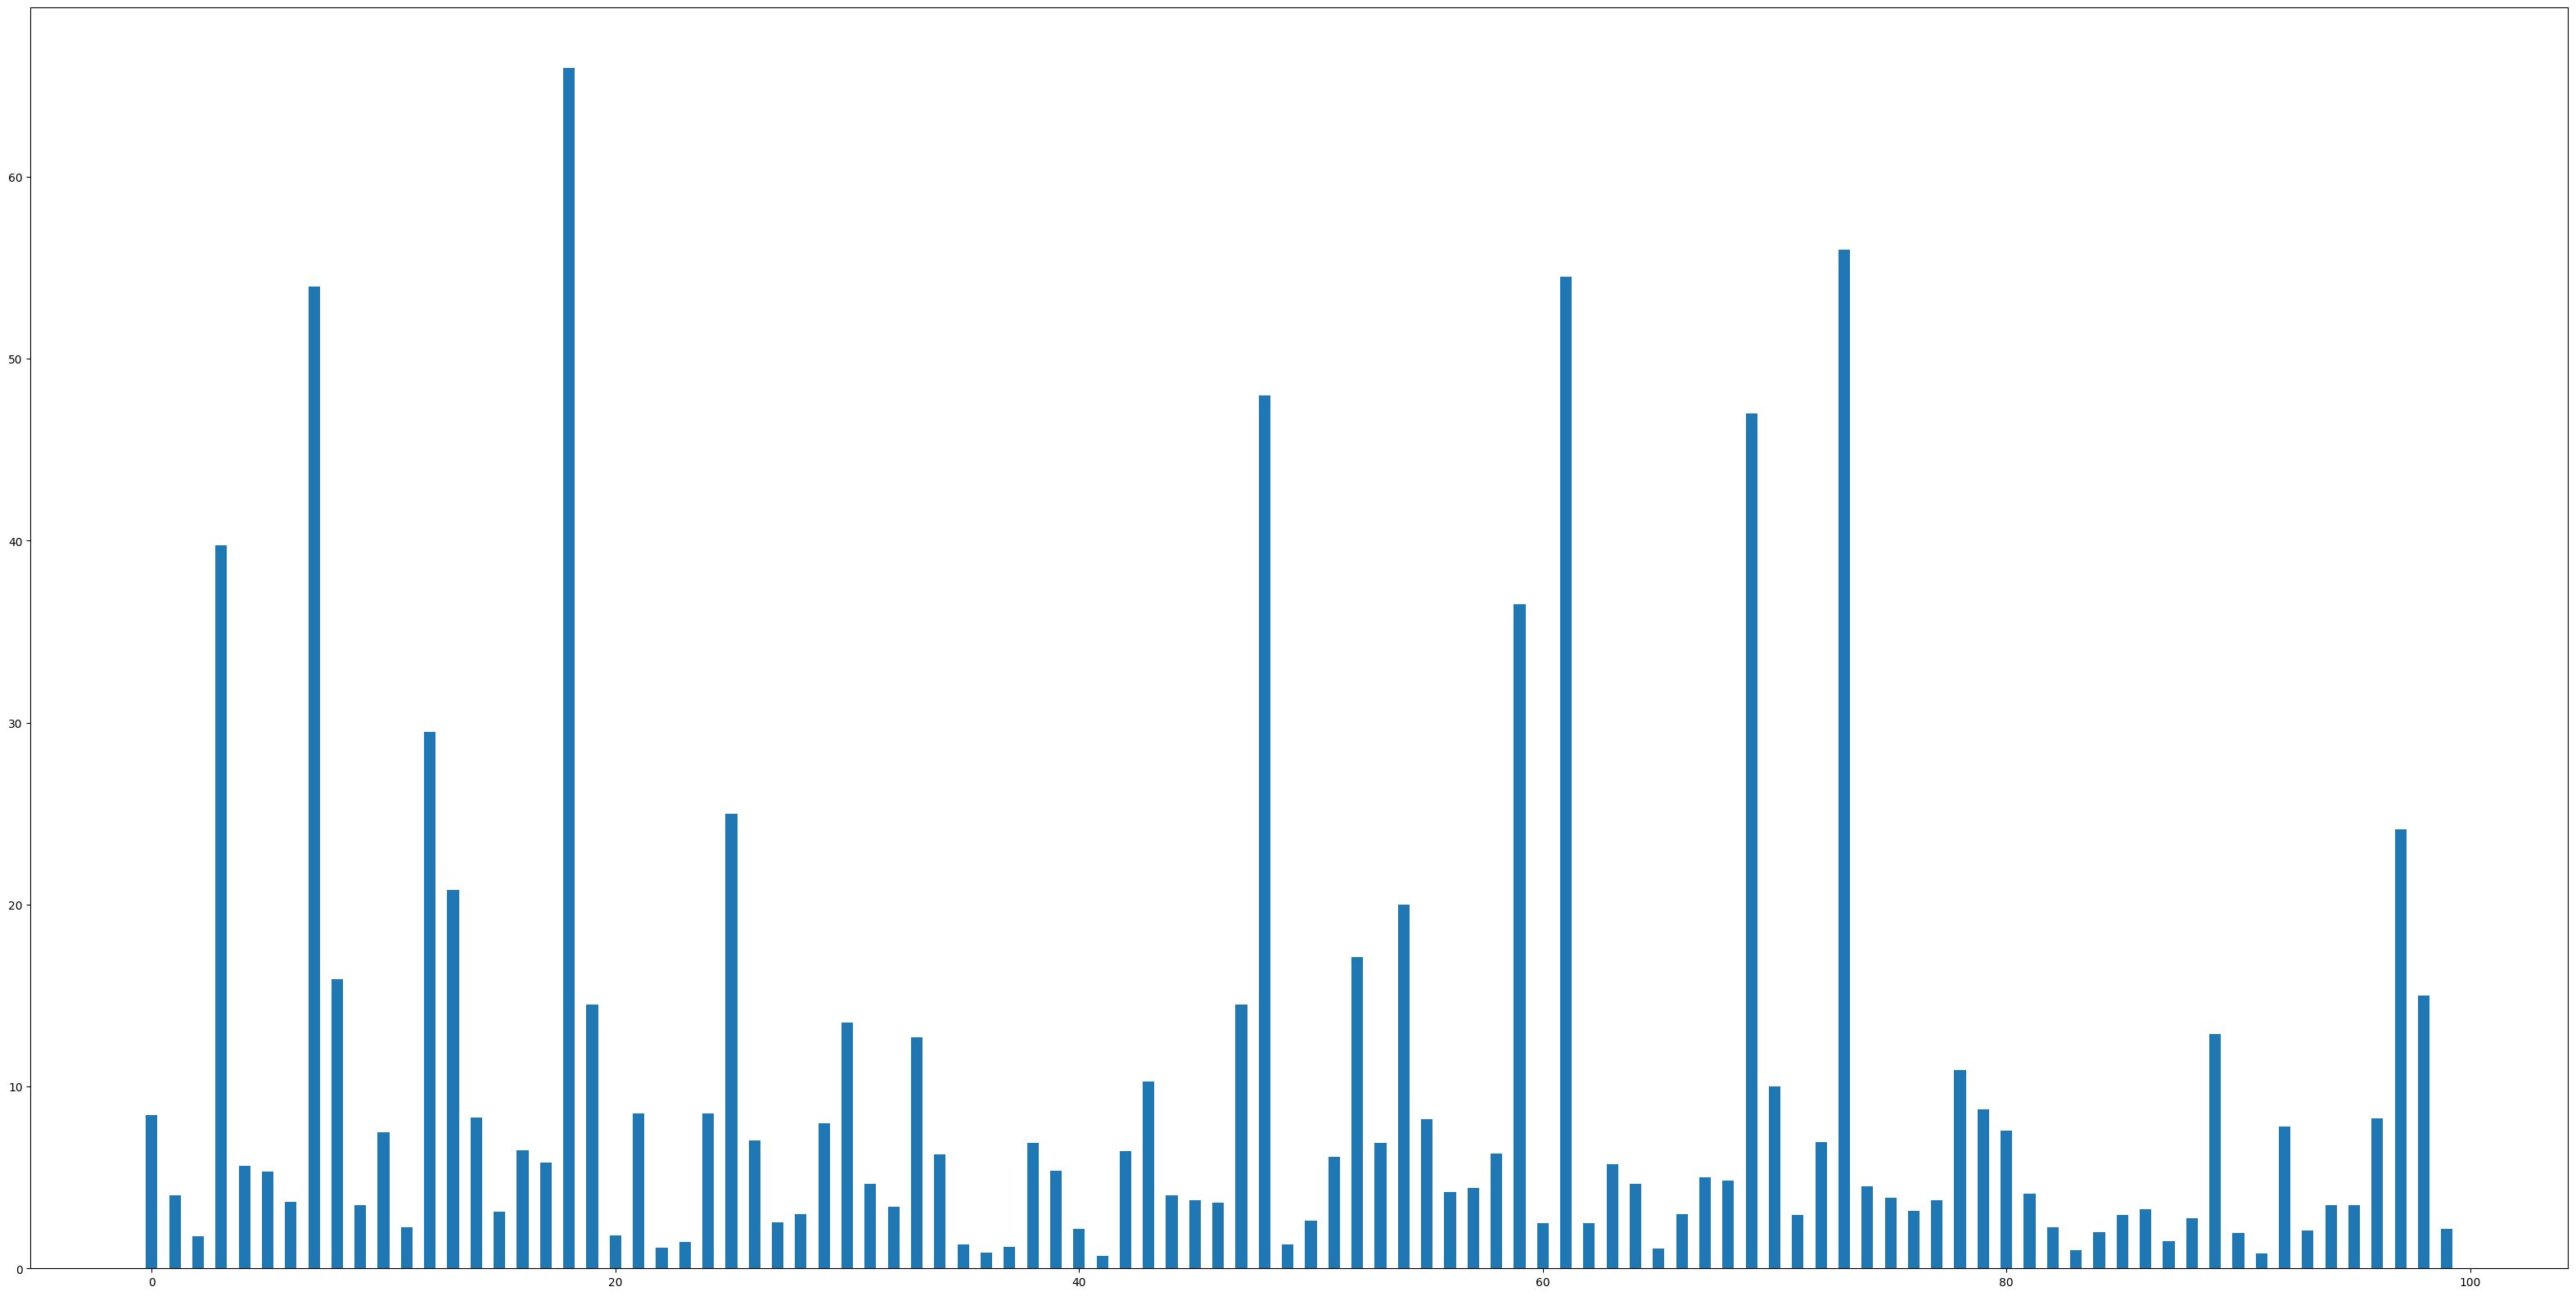

In [48]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
plt.bar(ind,y_true[:100],width=0.5,label='True')
plt.show()

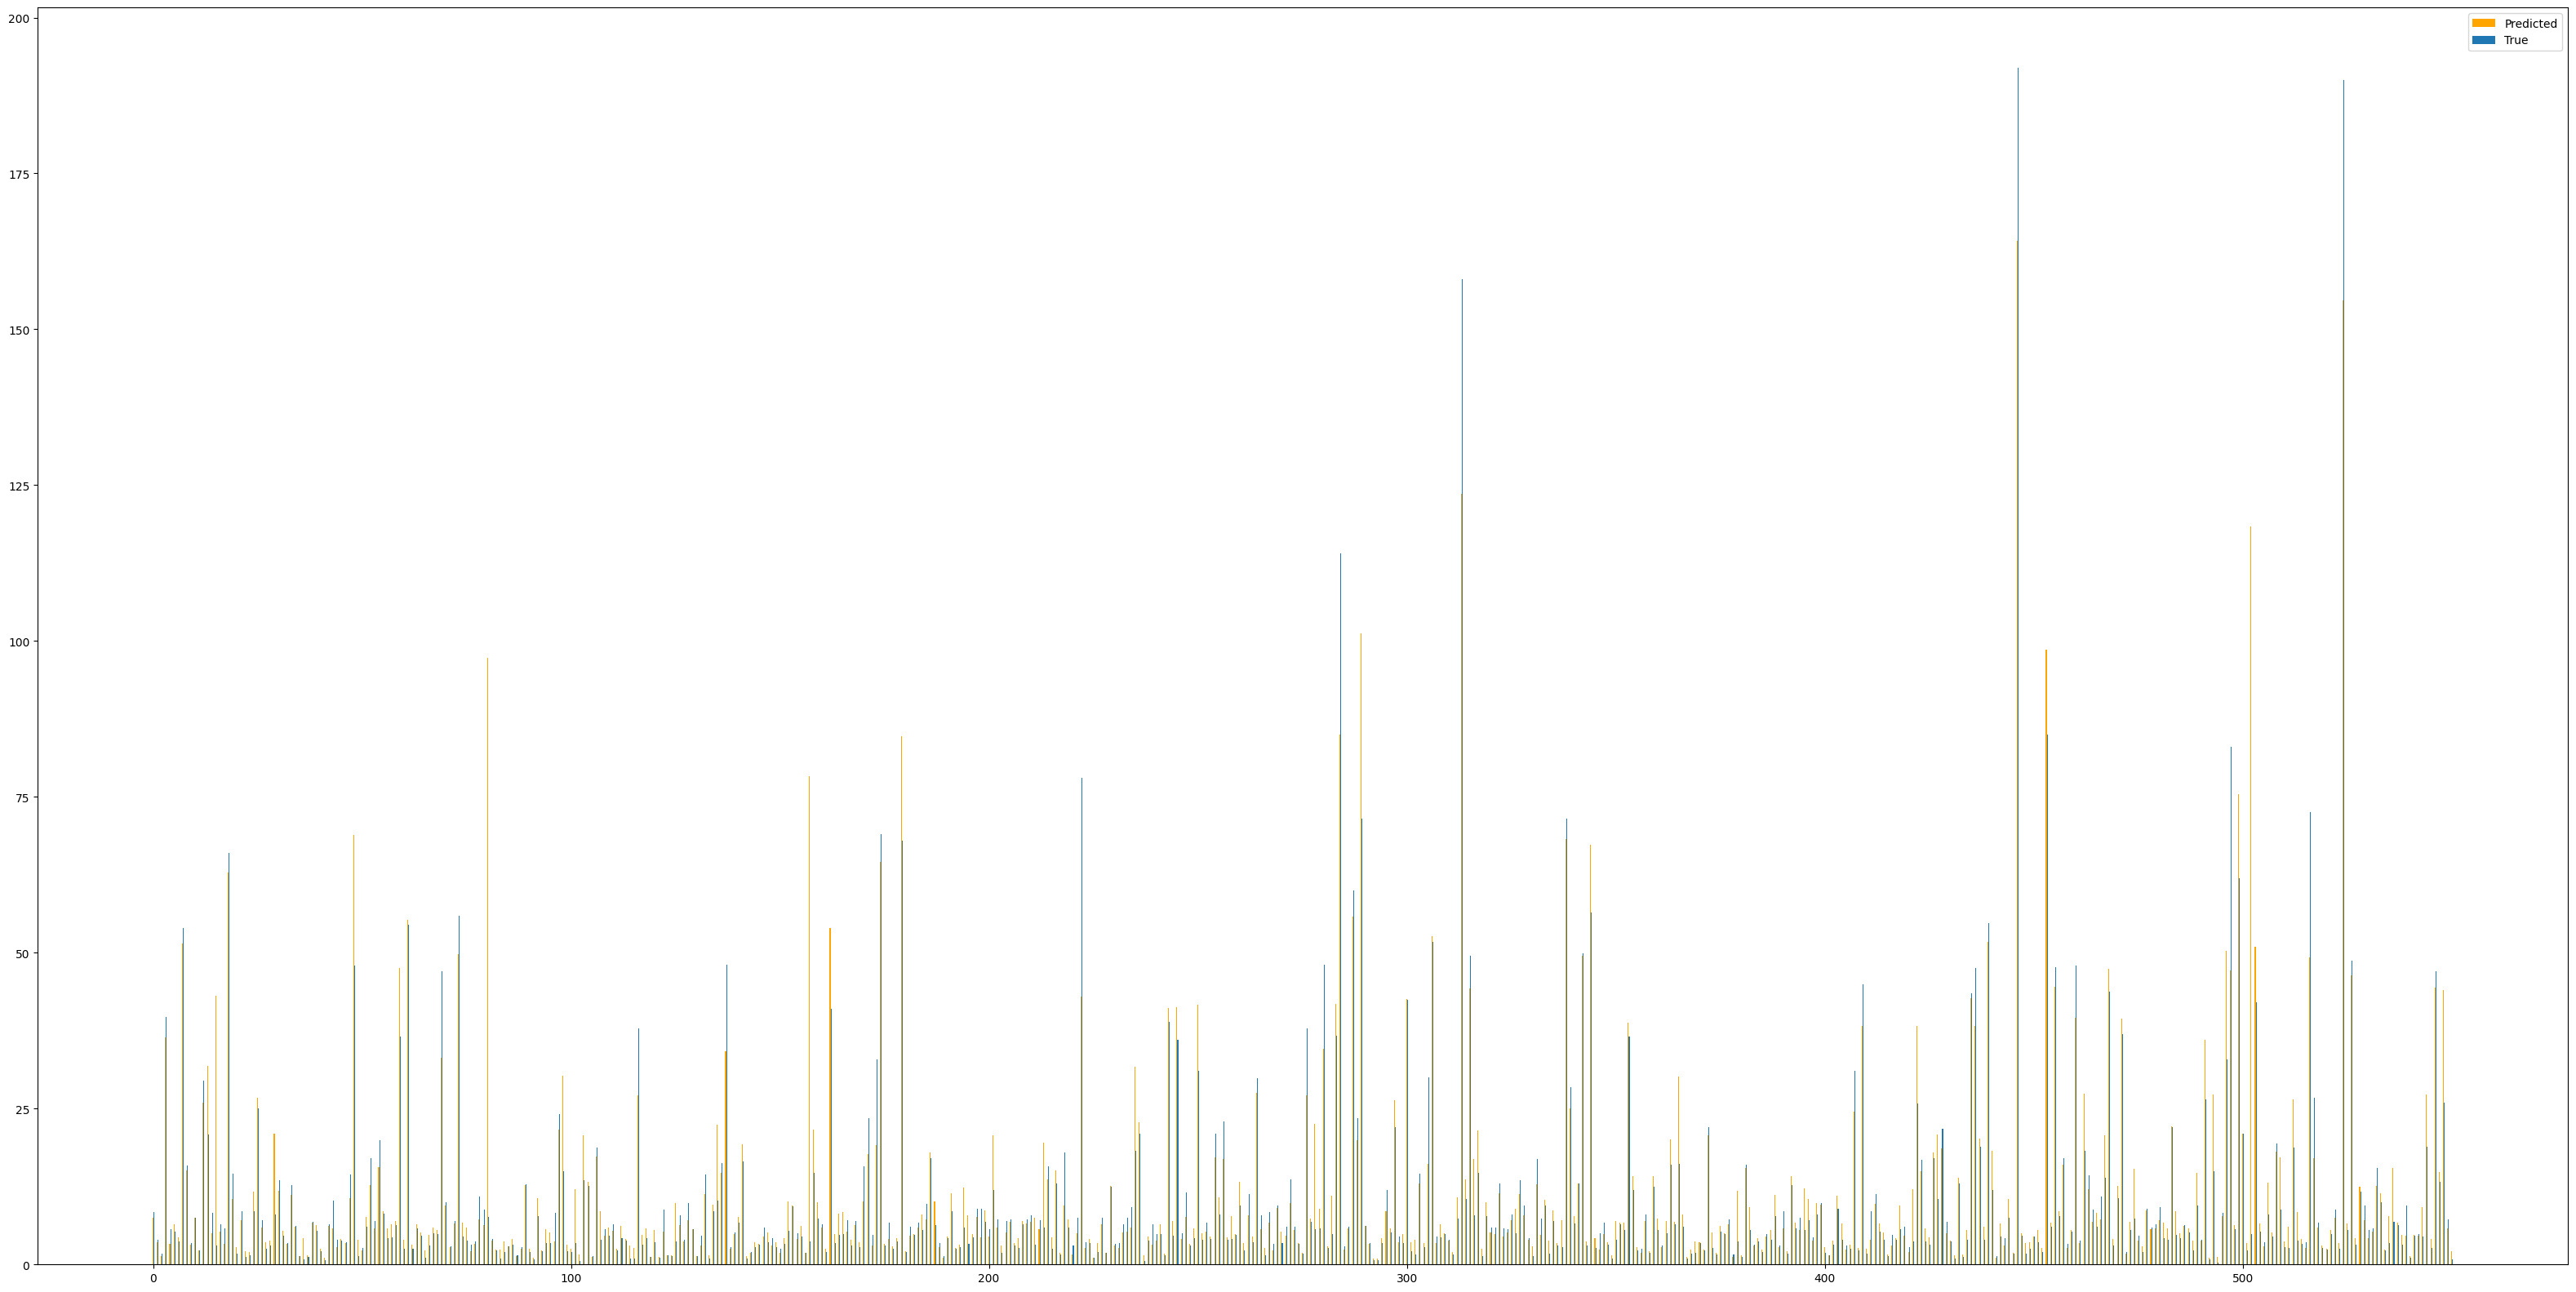

In [49]:
ind = np.arange(551)
plt.figure(figsize=(40,20))

width = 0.2

# plt.bar(ind,y_pred[:100],width,label='Predicted')
# plt.bar(ind+width,y_true[:100],width,label='True')
                                                            # Both are valid.
plt.bar(ind,y_pred[ind],width,label='Predicted',color = "orange")
plt.bar(ind+width,y_true[ind],width,label='True')


plt.legend()
plt.show()

In [40]:
import pickle

In [50]:
with open('car_predict_model.pkl','wb') as file:
  pickle.dump(model,file)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [51]:
!zip -r model_files.zip car_predict_model.pkl

  adding: car_predict_model.pkl (deflated 80%)


In [52]:
from google.colab import files

files.download('/content/model_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import pandas as pd
data = pd.DataFrame([{
  "car_company": "Toyota",
  "kms_driven": 1000,
  "fuel_type": "Cng",
  "transmission": "Manual",
  "ownership": 2,
  "manufacture_year": 2019,
  "engine_power_in_cc": 1399,
  "seats": 4
}])

In [61]:
print(data)

  car_company  kms_driven fuel_type transmission  ownership  manufacture_year  \
0      Toyota        1000       Cng       Manual          2              2019   

   engine_power_in_cc  seats  
0                1399      4  


In [62]:
for encoder in encoders:
        data.loc[:,encoder] = encoders[encoder].transform(data.loc[:,encoder])

In [63]:
print(data)

  car_company  kms_driven fuel_type transmission  ownership  manufacture_year  \
0          29        1000         0            1          2              2019   

   engine_power_in_cc  seats  
0                1399      4  


In [66]:
tensor_data = tf.constant(data,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[2.900e+01, 1.000e+03, 0.000e+00, 1.000e+00, 2.000e+00, 2.019e+03,
        1.399e+03, 4.000e+00]], dtype=float32)>

In [67]:
normalizer.adapt(tensor_data)

In [70]:
print(model.predict(tensor_data))

[13.73224127]
